# Análisis Exploratorio de Datos.

### Abstract.

El análisis exploratorio de datos se realizó para la observación del comportamiento de los datos referentes al consumo y demanda eléctrica nacional proporcionado por el Centro Nacional de Control de Energía (CENACE). La utilidad de este análisis radica en poder tener un registro gráfico de los dias de interés, tomando en cuenta las diferentes regiones del Sistema Interconectado Nacional (Baja California Norte, Baja California Sur, Central, Noreste, Noroeste, Norte, Occidental, Oriental, Peninsular).


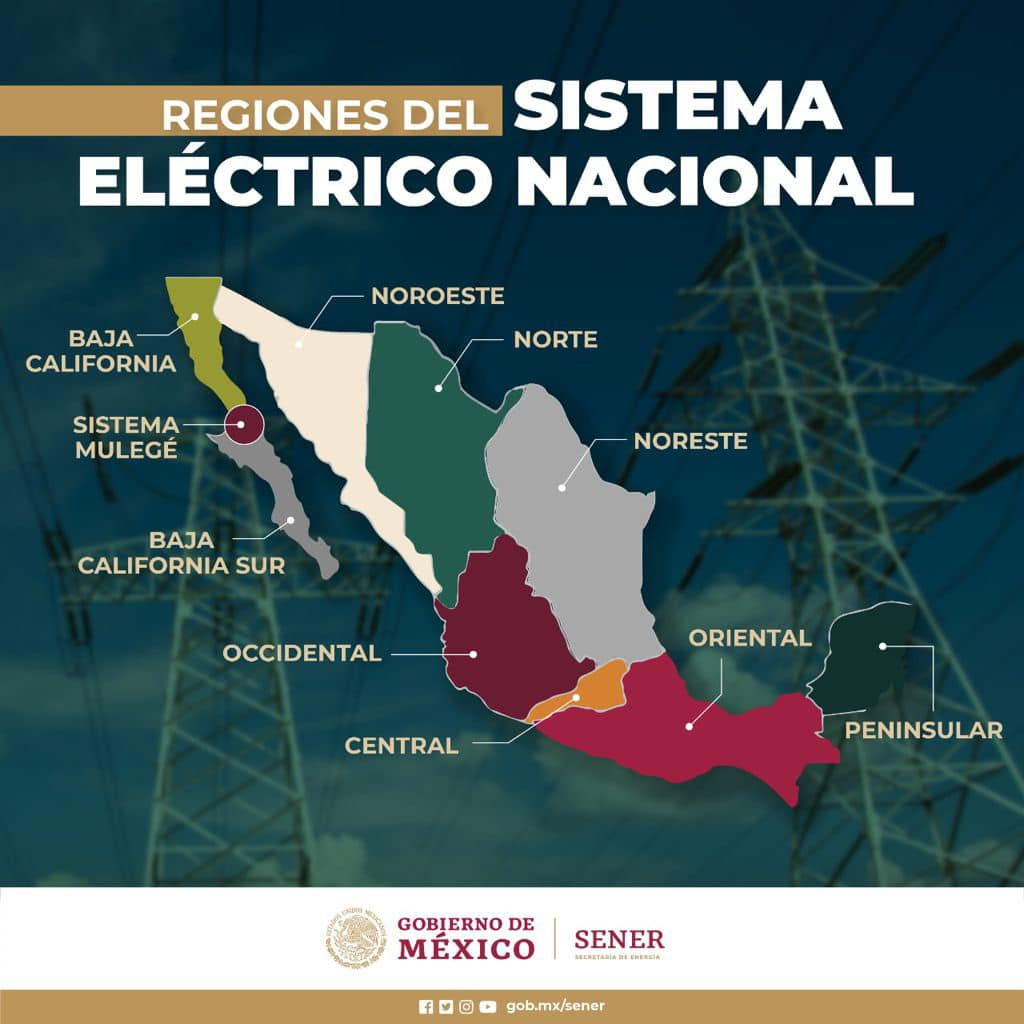

### 1.- Introducción.

El Sistema Eléctrico Nacional (SEN) de México es una infraestructura integral y compleja que abarca la generación, transmisión y distribución de energía eléctrica en todo el país. El SEN es gestionado por la Comisión Federal de Electricidad (CFE) y la Comisión Reguladora de Energía (CRE), y desempeña un papel fundamental en el suministro de electricidad para las necesidades domésticas, comerciales e industriales de México.

El SEN se compone de una red interconectada de instalaciones y líneas de transmisión de alta tensión que permiten la transferencia de electricidad desde las plantas generadoras hasta los centros de consumo en todo el territorio nacional. Las principales características del Sistema Eléctrico Nacional de México incluyen:

* **Generación Diversificada**: El SEN cuenta con una mezcla diversa de fuentes de generación eléctrica que incluye plantas termoeléctricas, hidroeléctricas, eólicas, solares y nucleares. Esta diversificación contribuye a la seguridad del suministro y a la reducción de impactos ambientales.

* **Red de Transmisión de Alta Tensión**: La red de transmisión de alta tensión conecta las centrales de generación con los centros de distribución y los puntos de consumo en todo México. Esta infraestructura permite la transferencia eficiente de energía a largas distancias.

* **Centros de Distribución y Subestaciones**: En el nivel de distribución, el SEN está compuesto por subestaciones y centros de distribución que reducen la tensión de la electricidad generada y la dirigen a hogares, comercios e industrias.

* **Regulación y Supervisión**: La CRE supervisa la operación y el mercado eléctrico, promoviendo la competencia y la eficiencia en la generación y distribución de energía eléctrica. Además, se establecen políticas y regulaciones que promueven el uso sostenible de los recursos y la seguridad del sistema.

El Sistema Eléctrico Nacional de México es un componente esencial de la infraestructura del país, que evoluciona constantemente para satisfacer las demandas de energía, promover la sustentabilidad y garantizar un suministro confiable y accesible de electricidad para todos los sectores de la sociedad.







### 2.- Exploración de los datos.

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

documentos = os.listdir("../csv")
documentos.sort(key=lambda x: os.path.getmtime(os.path.join("../csv", x)))
ultimo = documentos[-1] 
df_general = pd.read_csv("../csv/" + ultimo)

df_general["Fecha"] = pd.to_datetime(df_general["Fecha"], format="%d-%m-%Y %H_%M_%S")
df_general["Hora"] = df_general["Fecha"].dt.strftime("%H")
df_general["Día"] = df_general["Fecha"].dt.strftime("%d-%m-%Y")
df_general = df_general.sort_values(by = "Hora")
columnas = ['Día', 'Hora', 'Región', 'Generación Neta MW', 'Demanda Neta MW', 'Diferencia MW']
df_general = df_general[columnas]

df = pd.DataFrame(df_general)
df

,Día,Hora,Región,Generación Neta MW,Demanda Neta MW,Diferencia MW
0,11-08-2023,00,Baja California,2516.0,2504.0,12.0
1,11-08-2023,00,Baja California Sur,570.0,557.0,13.0
2,11-08-2023,00,CENTRAL,5258.0,6803.0,-1545.0
3,11-08-2023,00,NORESTE,13887.0,10648.0,3239.0
4,11-08-2023,00,NOROESTE,4851.0,4650.0,201.0
...,...,...,...,...,...,...
103,08-08-2023,23,NORESTE,14508.0,10655.0,3853.0
102,08-08-2023,23,CENTRAL,5338.0,7366.0,-2028.0
101,08-08-2023,23,Baja California Sur,620.0,605.0,15.0
104,08-08-2023,23,NOROESTE,4733.0,5430.0,-697.0


El proceso de web scrapping aplicado nos da la información de generación y demanda en el lapso de un día, en todas las regiones del Sistema Eléctrico Nacional. Esto nos permite hacer una análisis del comportamiento de dicho consumo en las horas en las que se llega a valores máximos y mínimos.

### Valores máximos y minimos de generación en MW por región.

In [97]:
df.groupby("Región")[['Generación Neta MW', 'Demanda Neta MW']].agg(['max', 'min']).sort_values(by = ('Generación Neta MW', 'max'), ascending = False)

Generación Neta MW          Demanda Neta MW         
                                   max      min             max      min
Región                                                                  
S.I. NACIONAL                  49415.0  39991.0         49252.0  39738.0
NORESTE                        14508.0  10301.0         10820.0   8590.0
ORIENTAL                       11213.0   7039.0          7998.0   6411.0
OCCIDENTAL                      7991.0   5164.0         10106.0   8089.0
NORTE                           6085.0   4086.0          5212.0   4366.0
CENTRAL                         5866.0   3715.0          8057.0   5889.0
NOROESTE                        5520.0   3808.0          5536.0   3602.0
Baja California                 2823.0   2052.0          3043.0   2067.0
PENINSULAR                      1962.0   1251.0          2569.0   1917.0
Baja California Sur              656.0    441.0           639.0    433.0

Mediante esta tabla podemos darnos cuenta que la región de mayores picos de generación y demanda del país se encuentra en el Noroeste, esto se pudiera entender al ser una de las zonas industriales mas grandes del país. Por otra parte, la zona con valores mas bajos es la zona dee Baja California Sur. Esto se puede deber a que al tratarse de una zona cuya principal actividad es el turismo, no hace un consumo de cantidades industriales de energia eléctrica, y en su lugar lo hace para consumo doméstico.

### Valores promedio de generación y demanda en MW por región.

In [98]:
df.groupby("Región")[['Generación Neta MW', 'Demanda Neta MW']].mean().sort_values(by='Generación Neta MW', ascending = False)

,Generación Neta MW,Demanda Neta MW
Región,,
S.I. NACIONAL,45306.173913,45134.217391
NORESTE,13066.434783,9811.956522
ORIENTAL,9117.652174,7200.304348
OCCIDENTAL,6952.217391,9284.304348
NORTE,4988.260870,4795.652174
CENTRAL,4925.913043,7202.130435
NOROESTE,4692.434783,4607.608696
Baja California,2441.086957,2568.608696
PENINSULAR,1563.434783,2230.521739


<Axes: title={'center': 'Generación vs. Demanda'}, xlabel='Región', ylabel='MW'>

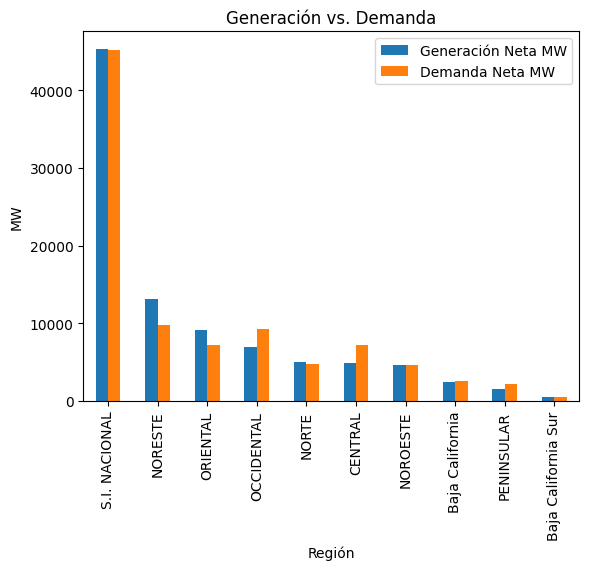

In [99]:
df.groupby("Región")[['Generación Neta MW', 'Demanda Neta MW']].mean().sort_values(by='Generación Neta MW', ascending = False).plot(kind = 'bar', title = 'Generación vs. Demanda', ylabel = 'MW')

Al analizar el orden de las regiones con los valores promedio, nos damos cuenta que siguen el mismo comportamiento que en el analisis anterior de los valroes máximos y minimos. Siendo los mayores generadores las regiones de Noreste, Oriental y Occidental.

### Regiones con mayor diferencia entre demanda y consumo eléctrico.

In [101]:
df.groupby('Región')['Diferencia MW'].sum().sort_values(ascending = True)

Región
OCCIDENTAL            -53638.0
CENTRAL               -52353.0
PENINSULAR            -15343.0
Baja California        -2933.0
Baja California Sur      325.0
NOROESTE                1951.0
S.I. NACIONAL           3955.0
NORTE                   4430.0
ORIENTAL               44099.0
NORESTE                74853.0
Name: Diferencia MW, dtype: float64

<Axes: title={'center': 'Déficit de producción'}, xlabel='Región', ylabel='MW'>

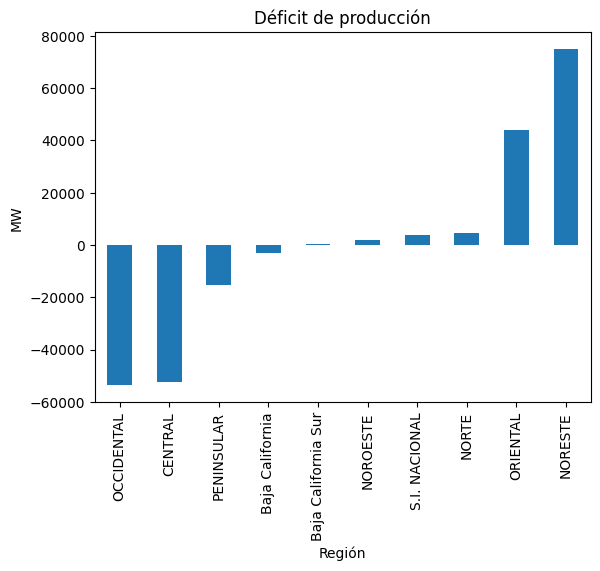

In [102]:
df.groupby('Región')['Diferencia MW'].sum().sort_values(ascending = True).plot(kind = 'bar', title = 'Déficit de producción', ylabel = 'MW')

Aquí podemos observar que las regiones Occidental, Central, Peninsular y Baja California manejan valres negativos de diferencia, lo cual quiere decir que son regiones que manejan un déficit de producción de la energía eléctrica que consumen y hacen uso del Sistema Integrado Nacional para poder abastecerse.


### Comparación de los datos de generación y consumo a lo largo del día en la región Occidental con la Noreste.

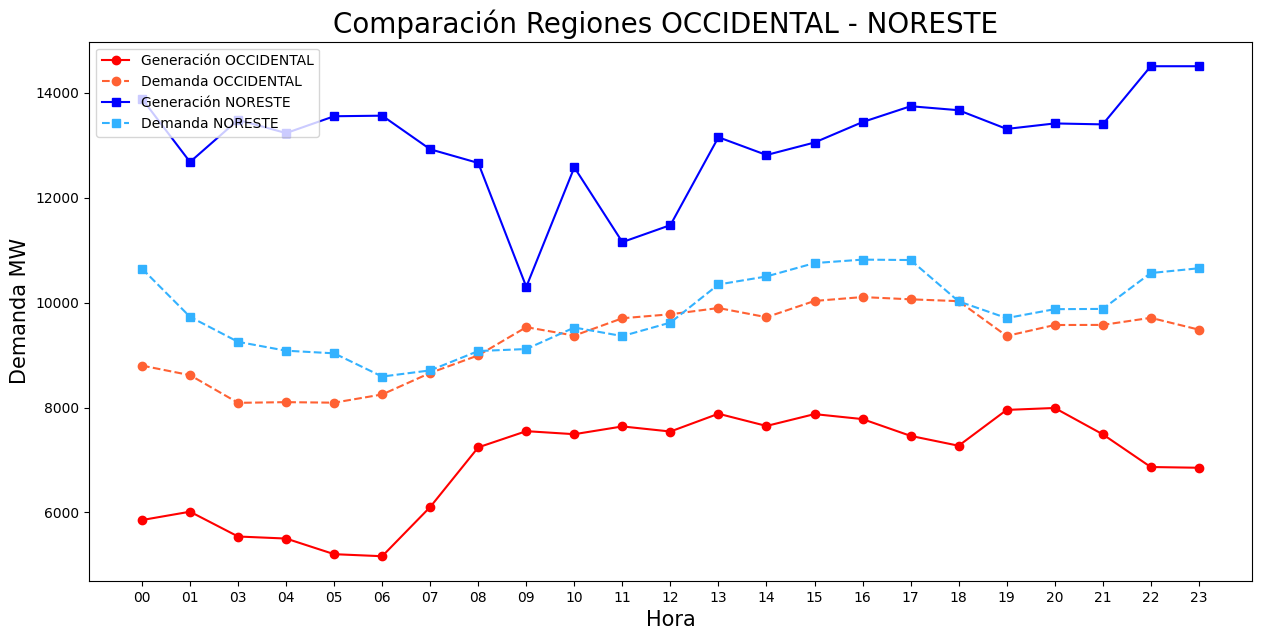

In [138]:
def graficadora(regiones):
    """
    Genera una gráfica de comparación a partir de una lista que contiene las regiones de interés.

    Args:
        regiones (list): Nombres de las regiones que interesa graficar.

    Returns:
        gráfico de comparación de dos regiones
    """
    # Configuraciónes previas
    plt.figure(figsize=(15, 7)) 
    colores = [["red", "#FF6133"], ["blue", "#33B2FF"]]
    marcadores = ['o','s']
        
    for idx, region in enumerate(regiones):
        df_region = df[df['Región'] == region]
        puntos_medios = (df_region["Generación Neta MW"] + df_region["Demanda Neta MW"]) / 2
        diferencia = df_region["Generación Neta MW"] - df_region["Demanda Neta MW"]

        # Gráfica de línea para Generación Neta MW y Demanda Neta MW
        plt.plot(df_region["Hora"], df_region["Generación Neta MW"], label="Generación " + region, color=colores[idx][0], marker = marcadores[idx])
        plt.plot(df_region["Hora"], df_region["Demanda Neta MW"], label="Demanda " + region, color=colores[idx][1], linestyle="--", marker = marcadores[idx])
        
    plt.title(f"Comparación Regiones {regiones[0]} - {regiones[1]} ", fontsize=20)
    plt.xlabel("Hora", fontsize=15)
    plt.ylabel("Demanda MW", fontsize=15)
    plt.legend(loc="upper left")
    plt.show()

regiones = ['OCCIDENTAL', 'NORESTE']
graficadora(regiones)

## 3. Conclusiones

* El análisis exploratorio en nuestros datos indica que hay 5 zonas que se pueden considerar autosufucientees en generación de energpia eléctrica, mientras que otras 4 necesitan un abastecimiento generado en otra región dentro del mismo Sistema Eléctrico Nacional.

* Las principales regiones productoras son la Oriental y Noreste, mientras que las regiones que tienen un mayor déficit de produccion para poder abastecer sus necesidades de consumo con la zona Central del país y la zona Occidental.

* El Sistema Eléctrico Nacional sobrepasa su consumo por apenas 3955 MW, lo cual se puede considerar muy poco al tomar en cuenta un posible siniestro que comprometa el abastecimiento de energía eléctrica en el país.